![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto.
Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.

### 1. Introducción [0.5 puntos]

_Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto._

- Describir brevemente el problema planteado (¿Qué se intenta predecir?)
- Describir brevemente los datos de entrada que les provee el problema.
- Describir las métricas que utilizarán para evaluar los modelos generados. Eligan **una métrica** adecuada para el desarrollo del proyecto **según la tarea que deben resolver y la institución a la cuál será su contraparte** y luego justifiquen su elección. Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
- [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).
- [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.



### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._

Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.



In [1]:
#!pip install pyarrow

import pandas as pd
df = pd.read_parquet('dataset.pq')
df.head()


,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [2]:
df['credit_score'].unique()

array([0, 1])

In [3]:
df.isnull().sum() # check missing value

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._

#### 3.1 Preprocesamiento con `ColumnTransformer`

- Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)
- Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

- Luego, pruebe las transformaciones utilizando `fit_transform`.

- Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.




In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df['age'] = df['age'].astype('int64')
df['num_of_loan'] = df['num_of_loan'].astype('int64')
df['credit_score'] = df['credit_score'].astype('int64')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  int64  
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  int64  
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28,Teacher,34847.84,3037.986667,2,4,6,1,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34,Engineer,143162.64,12187.220000,1,5,8,3,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55,Entrepreneur,30689.89,2612.490833,2,5,4,-100,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21,Developer,35547.71,2853.309167,7,5,5,-100,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['credit_score'])
y = df['credit_score']
categorical_cols = ['occupation','payment_of_min_amount', 'payment_behaviour']
numeric_cols = X.select_dtypes(["int64", "float64"]).columns.tolist()

# Crear un ColumnTransformer con FunctionTransformer para aplicar pd.get_dummies y StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_cols),
        ('onehot', OneHotEncoder(sparse=False), categorical_cols)  # Utilizamos sparse=False para obtener un array en lugar de una matriz dispersa
    ],
    remainder='drop'
).set_output(transform="pandas")
# Configurar la salida como pandas DataFrame
# Aplicar las transformaciones al DataFrame
X = preprocessor.fit_transform(X)
# Obtener los nombres de las columnas después de OneHotEncoder
column_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols))

# Combinar los nombres de las columnas
new_column_names = numeric_cols + column_names

# Asignar los nuevos nombres de las columnas al DataFrame resultante
X.columns = new_column_names
X.head()

/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_!@9#%8,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,-0.124567,-0.109807,-0.744213,-0.121910,-0.145247,-0.149816,0.013833,-1.215198,-0.113447,0.128169,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.117042,-0.097684,-0.361945,-0.130655,-0.145247,-0.143415,-0.032248,-1.215198,-0.121871,-0.732255,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.108013,-0.014223,2.521028,-0.139400,-0.137672,-0.139148,-0.001527,-0.878781,-0.113447,-0.485159,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.076409,-0.100887,-0.496021,-0.130655,-0.137672,-0.147682,-1.583644,-1.147915,-0.100811,-1.236743,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.127577,-0.097144,-0.420138,-0.086928,-0.137672,-0.145549,-1.583644,-1.349765,-0.075541,-1.149965,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop(columns=['credit_score'])
y = df['credit_score']

categorical_cols = ['occupation','payment_of_min_amount', 'payment_behaviour']
numeric_cols = X.select_dtypes(["int64", "float64"]).columns.tolist()

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(sparse=False),  categorical_cols),
        ('StandardScaler', StandardScaler(),numeric_cols)]).set_output(transform="pandas")

X = preprocessing_transformer.fit_transform(X)
X.head()


/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,OneHotEncoder__occupation_Accountant,OneHotEncoder__occupation_Architect,OneHotEncoder__occupation_Developer,OneHotEncoder__occupation_Doctor,OneHotEncoder__occupation_Engineer,OneHotEncoder__occupation_Entrepreneur,OneHotEncoder__occupation_Journalist,OneHotEncoder__occupation_Lawyer,OneHotEncoder__occupation_Manager,OneHotEncoder__occupation_Mechanic,...,StandardScaler__delay_from_due_date,StandardScaler__num_of_delayed_payment,StandardScaler__changed_credit_limit,StandardScaler__num_credit_inquiries,StandardScaler__outstanding_debt,StandardScaler__credit_utilization_ratio,StandardScaler__credit_history_age,StandardScaler__total_emi_per_month,StandardScaler__amount_invested_monthly,StandardScaler__monthly_balance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.215198,-0.113447,0.128169,-0.122611,-0.533485,-1.631977,NaN,-0.168065,-0.299649,0.009074
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.215198,-0.121871,-0.732255,-0.133611,-0.710911,0.113367,1.056360,-0.171657,-0.204916,0.009074
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.878781,-0.113447,-0.485159,-0.128111,-0.106664,1.168498,-0.027754,-0.145005,4.568425,0.009074
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.147915,-0.100811,-1.236743,-0.122611,-0.687165,-0.972878,-0.148211,-0.171938,-0.250441,0.009074
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.349765,-0.075541,-1.149965,-0.122611,-0.417583,-1.257870,1.538188,-0.173855,-0.223252,0.009074


#### 3.2 Holdout

Ejecute `train_test_split` para generar un conjunto de entrenamiento, validacióny de prueba.




In [8]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Conjunto de Entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de Validación:", X_val.shape, y_val.shape)
print("Conjunto de Prueba:", X_test.shape, y_test.shape)

Conjunto de Entrenamiento: (8750, 43) (8750,)
Conjunto de Validación: (1875, 43) (1875,)
Conjunto de Prueba: (1875, 43) (1875,)


#### 3.3 Datos nulos.

Como habrá visto, existe la posibilidad de que algunos datos sean nulos. En esta sección se le solicita justificar, previo a comenzar el modelado, decidir si conservar e imputar los datos nulos o eliminar las filas.

Note que la decisión que tomen aquí puede afectar fuertemente el rendimiento de los modelos.
Y como siempre, más adelante tienen el espacio para experimentar con ambas opciones.



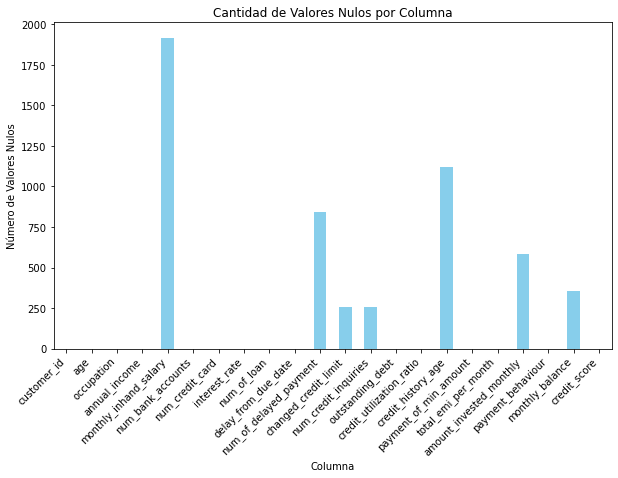

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz booleana indicando la presencia de valores nulos
null_counts = df.isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columna')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

In [10]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()
print(columns_with_nulls)


['monthly_inhand_salary', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'credit_history_age', 'amount_invested_monthly', 'monthly_balance']


In [39]:
from sklearn.impute import SimpleImputer

def preproces(df):
    X = df.drop(columns=['credit_score'])
    y = df[['credit_score']]
    categorical_cols = ['occupation','payment_of_min_amount', 'payment_behaviour']
    numeric_cols = X.select_dtypes(["int64", "float64"]).columns.tolist()
    
    # Crear un ColumnTransformer con FunctionTransformer para aplicar pd.get_dummies y StandardScaler
    preprocessor = ColumnTransformer(
        transformers=[
            ('scale', StandardScaler(), numeric_cols),
            ('onehot', OneHotEncoder(sparse=False), categorical_cols)  # Utilizamos sparse=False para obtener un array en lugar de una matriz dispersa
        ],
        remainder='drop'
    ).set_output(transform="pandas")
    # Configurar la salida como pandas DataFrame
    # Aplicar las transformaciones al DataFrame
    X = preprocessor.fit_transform(X)
    # Obtener los nombres de las columnas después de OneHotEncoder
    column_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols))
    
    # Combinar los nombres de las columnas
    new_column_names = numeric_cols + column_names
    
    # Asignar los nuevos nombres de las columnas al DataFrame resultante
    X.columns = new_column_names

    columns_with_nulls = X.columns[X.isnull().any()].tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    imputer = SimpleImputer(strategy='most_frequent')

    # Ajustar y transformar solo en el conjunto de entrenamiento
    train_df_imputed = X_train.copy()
    X_train[columns_with_nulls] = imputer.fit_transform(train_df_imputed[columns_with_nulls])
    
    # Transformar el conjunto de test utilizando el imputador ajustado al conjunto de entrenamiento
    test_df_imputed = X_test.copy()
    X_test[columns_with_nulls] = imputer.transform(test_df_imputed[columns_with_nulls])

    # Transformar el conjunto de validacion utilizando el imputador ajustado al conjunto de entrenamiento
    #val_df_imputed = X_val.copy()
    #X_val[columns_with_nulls] = imputer.transform(val_df_imputed[columns_with_nulls])

    return X_train, X_test, y_train, y_test


In [40]:
df_train, df_test, dfy_train, dfy_test = preproces(df)

In [41]:
dfy_train

,credit_score
5227,0
10680,0
8744,0
1543,0
3263,0
...,...
11964,0
5191,0
5390,0
860,0


#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos.

### 4. Baseline [1.5 puntos]

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- Implementar un imputador en caso de haber decidido conservar los datos nulos.
- Implementar un clasificador en la salida (ver siguiente lista).
  
Y además,
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier`
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.




In [14]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X = df.drop(columns=['credit_score'])
y = df['credit_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Dummy': DummyClassifier(strategy='stratified'),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'XGBClassifier': XGBClassifier()
}

metrics_df = []

for model_name, classifier in classifiers.items():
    preprocessing_transformer = ColumnTransformer(
        transformers=[
         ('OneHotEncoder', OneHotEncoder(sparse=False),  categorical_cols),
         ('StandardScaler', StandardScaler(),numeric_cols)
        ]
    )
    imputer = SimpleImputer(strategy='median')

    model_pipeline = Pipeline([
        ('preprocessing', preprocessing_transformer),
        ('imputer', imputer),
        ('classifier', classifier)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    unique_labels = set(y_test)
    print(unique_labels)

    report = classification_report(y_test, y_pred, output_dict=True)

    metric_value = report['weighted avg']['f1-score']
    metrics_df.append({'Modelo': model_name, 'Métrica': metric_value})

/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{0, 1}
{0, 1}
{0, 1}


/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{0, 1}
{0, 1}


/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{0, 1}
[LightGBM] [Info] Number of positive: 2870, number of negative: 7130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287000 -> initscore=-0.909999
[LightGBM] [Info] Start training from score -0.909999


/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{0, 1}
{0, 1}


/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
metrics_df = pd.DataFrame(metrics_df)
metrics_df = metrics_df.sort_values(by='Métrica', ascending=False)
print(metrics_df)


                   Modelo   Métrica
6          LGBMClassifier  0.780885
5  RandomForestClassifier  0.774688
7           XGBClassifier  0.769581
4                     SVC  0.726286
2    KNeighborsClassifier  0.715537
1      LogisticRegression  0.707449
3  DecisionTreeClassifier  0.696046
0                   Dummy  0.585991


### 5. Optimización del Modelo [1.5 puntos]

_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- Usar **`Optuna`** para tunear hiperparámetros
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- Variar el imputador de datos en caso de usarlo.

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
2. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/).
3. **Probar pycaret (AutoML)** [0.3 extras].

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
import optuna
from sklearn.metrics import f1_score
from tqdm import tqdm
X = df.drop(columns=['credit_score'])
y = df['credit_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### LGBMC

In [18]:
preprocessing_transformer = ColumnTransformer(
    transformers=[
     ('OneHotEncoder', OneHotEncoder(sparse=False),  categorical_cols),
     ('StandardScaler', StandardScaler(),numeric_cols)
    ]
)
imputer = SimpleImputer(strategy='median')

pipeline_1 = Pipeline([
    ('preprocessing', preprocessing_transformer),
    ('imputer', imputer),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', LGBMClassifier())
])

In [19]:

# Definir el espacio de búsqueda de hiperparámetros para Optuna
def objective(trial):
    params = {
        'classifier__num_leaves': trial.suggest_int('classifier__num_leaves', 2, 256),
        'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 1e-3, 1, log=True),
        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 1, 100),
        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 5, 150),
        'classifier__min_child_samples': trial.suggest_int('classifier__min_child_samples', 5, 100),
        'classifier__min_child_weight': trial.suggest_float('classifier__min_child_weight', 1e-6, 1.0),
        'classifier__reg_alpha': trial.suggest_float('classifier__reg_alpha', 1e-8, 10.0, log=True),
        'classifier__reg_lambda': trial.suggest_float('classifier__reg_lambda', 1e-8, 10.0, log=True),
        'classifier__min_split_gain': trial.suggest_float('classifier__min_split_gain', 0.0, 1.0),
        'feature_selection__k': trial.suggest_int('feature_selection__k', 1, len(X.columns)),
        'imputer__strategy': trial.suggest_categorical('imputer__strategy', ['mean', 'median', 'most_frequent'])
    }
    pipeline_1.set_params(**params)
    
    # Entrenar el modelo con los hiperparámetros sugeridos por Optuna
    pipeline_1.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predictions = pipeline_1.predict(X_test)

    # Calcular F1-score
    report = classification_report(y_test, predictions, output_dict=True)

    metric_value = report['weighted avg']['f1-score']
    #f1 = f1_score(y_test, predictions, average='binary')
    return metric_value

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Realizar la optimización de hiperparámetros con Optuna
import sys
import io
import logging

# Desactivar completamente los mensajes de Optuna
logging.disable(logging.CRITICAL)

# ... (Resto de tu código)

# Realizar la optimización de hiperparámetros con Optuna
study = optuna.create_study(direction='maximize')

# Número total de ensayos
total_trials = 100

# Redirigir la salida estándar de Optuna y silenciarla
original_stdout = sys.stdout
sys.stdout = io.StringIO()

  # Puedes ajustar el número de trabajos en paralelo según tus recursos
try:
    study.optimize(objective, n_trials=100)
finally:
    # Restaurar la salida estándar original
    sys.stdout = original_stdout

# Imprimir los resultados de la optimización (opcional)
print("Mejores parámetros encontrados:")
print(study.best_params)
print("Mejor valor de la métrica (F1-score):")
print(study.best_value)

/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Mejores parámetros encontrados:
{'classifier__num_leaves': 22, 'classifier__learning_rate': 0.06505997538859655, 'classifier__max_depth': 21, 'classifier__n_estimators': 82, 'classifier__min_child_samples': 57, 'classifier__min_child_weight': 0.28847242327349115, 'classifier__reg_alpha': 7.095924570898992e-06, 'classifier__reg_lambda': 0.005867498429813115, 'classifier__min_split_gain': 0.7230068540433374, 'feature_selection__k': 21, 'imputer__strategy': 'most_frequent'}
Mejor valor de la métrica (F1-score):
0.7783612825306101


#### XGB

In [21]:
preprocessing_transformer = ColumnTransformer(
    transformers=[
     ('OneHotEncoder', OneHotEncoder(sparse=False),  categorical_cols),
     ('StandardScaler', StandardScaler(),numeric_cols)
    ]
)
imputer = SimpleImputer(strategy='median')

pipeline_2 = Pipeline([
    ('preprocessing', preprocessing_transformer),
    ('imputer', imputer),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', XGBClassifier())
])

In [22]:
def objective2(trial):
    params = {
        'classifier__max_leaves': trial.suggest_int('classifier__max_leaves', 2, 256),
        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 50, 200),
        'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.001, 0.1, log=True),
        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 3, 10),
        'classifier__subsample': trial.suggest_float('classifier__subsample', 0.5, 1.0),
        'classifier__colsample_bytree': trial.suggest_float('classifier__colsample_bytree', 0.5, 1.0),
        'classifier__gamma': trial.suggest_float('classifier__gamma', 0, 1.0),
        'classifier__num_parallel_tree': trial.suggest_int('classifier__num_parallel_tree', 2, 50),
        'feature_selection__k': trial.suggest_int('feature_selection__k', 1, len(X.columns)),
        'imputer__strategy': trial.suggest_categorical('imputer__strategy', ['mean', 'median', 'most_frequent'])
    }

    pipeline_2.set_params(**params)
    
    # Entrenar el modelo con los hiperparámetros sugeridos por Optuna
    pipeline_2.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predictions = pipeline_2.predict(X_test)

    # Calcular F1-score
    report = classification_report(y_test, predictions, output_dict=True)

    metric_value = report['weighted avg']['f1-score']
    #f1 = f1_score(y_test, predictions, average='binary')
    return metric_value



In [23]:
# Crear un estudio de Optuna y realizar la optimización
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=100)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(study2.best_params)
print("Mejor valor de la métrica:")
print(study2.best_value)

/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Mejores parámetros encontrados:
{'classifier__max_leaves': 176, 'classifier__n_estimators': 179, 'classifier__learning_rate': 0.04515453527754518, 'classifier__max_depth': 3, 'classifier__subsample': 0.9164259999066134, 'classifier__colsample_bytree': 0.9208006484330301, 'classifier__gamma': 0.9532078538424206, 'classifier__num_parallel_tree': 22, 'feature_selection__k': 20, 'imputer__strategy': 'median'}
Mejor valor de la métrica:
0.7777776954795591


### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.
- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?
- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.
- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

### Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto:

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Realizar la optimización de hiperparámetros con Optuna
import sys
import io
import logging

# Desactivar completamente los mensajes de Optuna
logging.disable(logging.CRITICAL)

def objective3(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'n_estimators': trial.suggest_int('n_estimators', 5, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0)
    }

    model = LGBMClassifier(**params)


    # Entrenar el modelo
    model.fit(df_train, dfy_train)

    # Realizar predicciones en el conjunto de prueba
    predictions = model.predict(df_test)

    # Calcular F1-score
    report = classification_report(dfy_test, predictions, output_dict=True)

    metric_value = report['weighted avg']['f1-score']
    #f1 = f1_score(y_test, predictions, average='binary')
    return metric_value



In [25]:
# Redirigir la salida estándar de Optuna y silenciarla
original_stdout = sys.stdout
sys.stdout = io.StringIO()

  # Puedes ajustar el número de trabajos en paralelo según tus recursos
# Crear un estudio de Optuna y realizar la optimización
study3 = optuna.create_study(direction='maximize')
try:
    study3.optimize(objective3, n_trials=100)
finally:
    # Restaurar la salida estándar original
    sys.stdout = original_stdout

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(study3.best_params)
print("Mejor valor de la métrica:")
print(study3.best_value)

/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeallendes/anaconda3/envs/mds7202/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Mejores parámetros encontrados:
{'num_leaves': 82, 'learning_rate': 0.06631561975072739, 'max_depth': 38, 'n_estimators': 55, 'min_child_samples': 7, 'min_child_weight': 0.19501094167808608, 'reg_alpha': 6.6942014860154405e-06, 'reg_lambda': 0.007522243433178167, 'min_split_gain': 0.8732410296058374}
Mejor valor de la métrica:
0.7845915826310792


In [26]:
study3.best_params

{'num_leaves': 82,
 'learning_rate': 0.06631561975072739,
 'max_depth': 38,
 'n_estimators': 55,
 'min_child_samples': 7,
 'min_child_weight': 0.19501094167808608,
 'reg_alpha': 6.6942014860154405e-06,
 'reg_lambda': 0.007522243433178167,
 'min_split_gain': 0.8732410296058374}

In [42]:
model = LGBMClassifier(**study3.best_params)
model.fit(df_train, dfy_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Info] Number of positive: 2537, number of negative: 6213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2422
[LightGBM] [Info] Number of data points in the train set: 8750, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289943 -> initscore=-0.895662
[LightGBM] [Info] Start training from score -0.895662


LGBMClassifier(learning_rate=0.06631561975072739, max_depth=38,
               min_child_samples=7, min_child_weight=0.19501094167808608,
               min_split_gain=0.8732410296058374, n_estimators=55,
               num_leaves=82, reg_alpha=6.6942014860154405e-06,
               reg_lambda=0.007522243433178167)

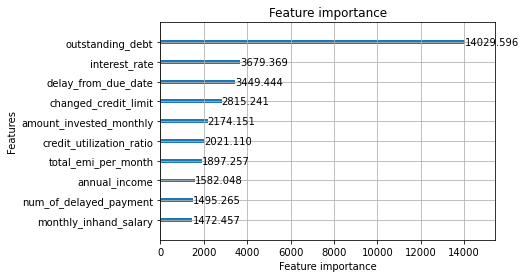

In [43]:
import matplotlib.pyplot as plt
import lightgbm as lgb
# Visualizar importancia de características
lgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

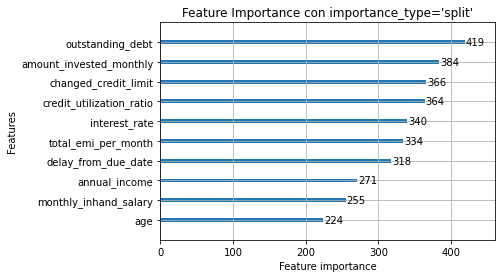

In [44]:
lgb.plot_importance(model, max_num_features=10, importance_type="split")
plt.title("Feature Importance con importance_type='split'")
plt.show()

In [55]:
df_train.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance', 'occupation_Accountant', 'occupation_Architect',
       'occupation_Developer', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Entrepreneur', 'occupation_Journalist', 'occupation_Lawyer',
       'occupation_Manager', 'occupation_Mechanic', 'occupation_Media_Manager',
       'occupation_Musician', 'occupation_Scientist', 'occupation_Teacher',
       'occupation_Writer', 'occupation________', 'payment_of_min_amount_NM',
       'payment_of_min_amount_No', 'payment_of_min_amount_Yes',
       'payment_behaviour_!@9#%8',
       'payment_behaviour_High_spent_Large_value_payments',
    

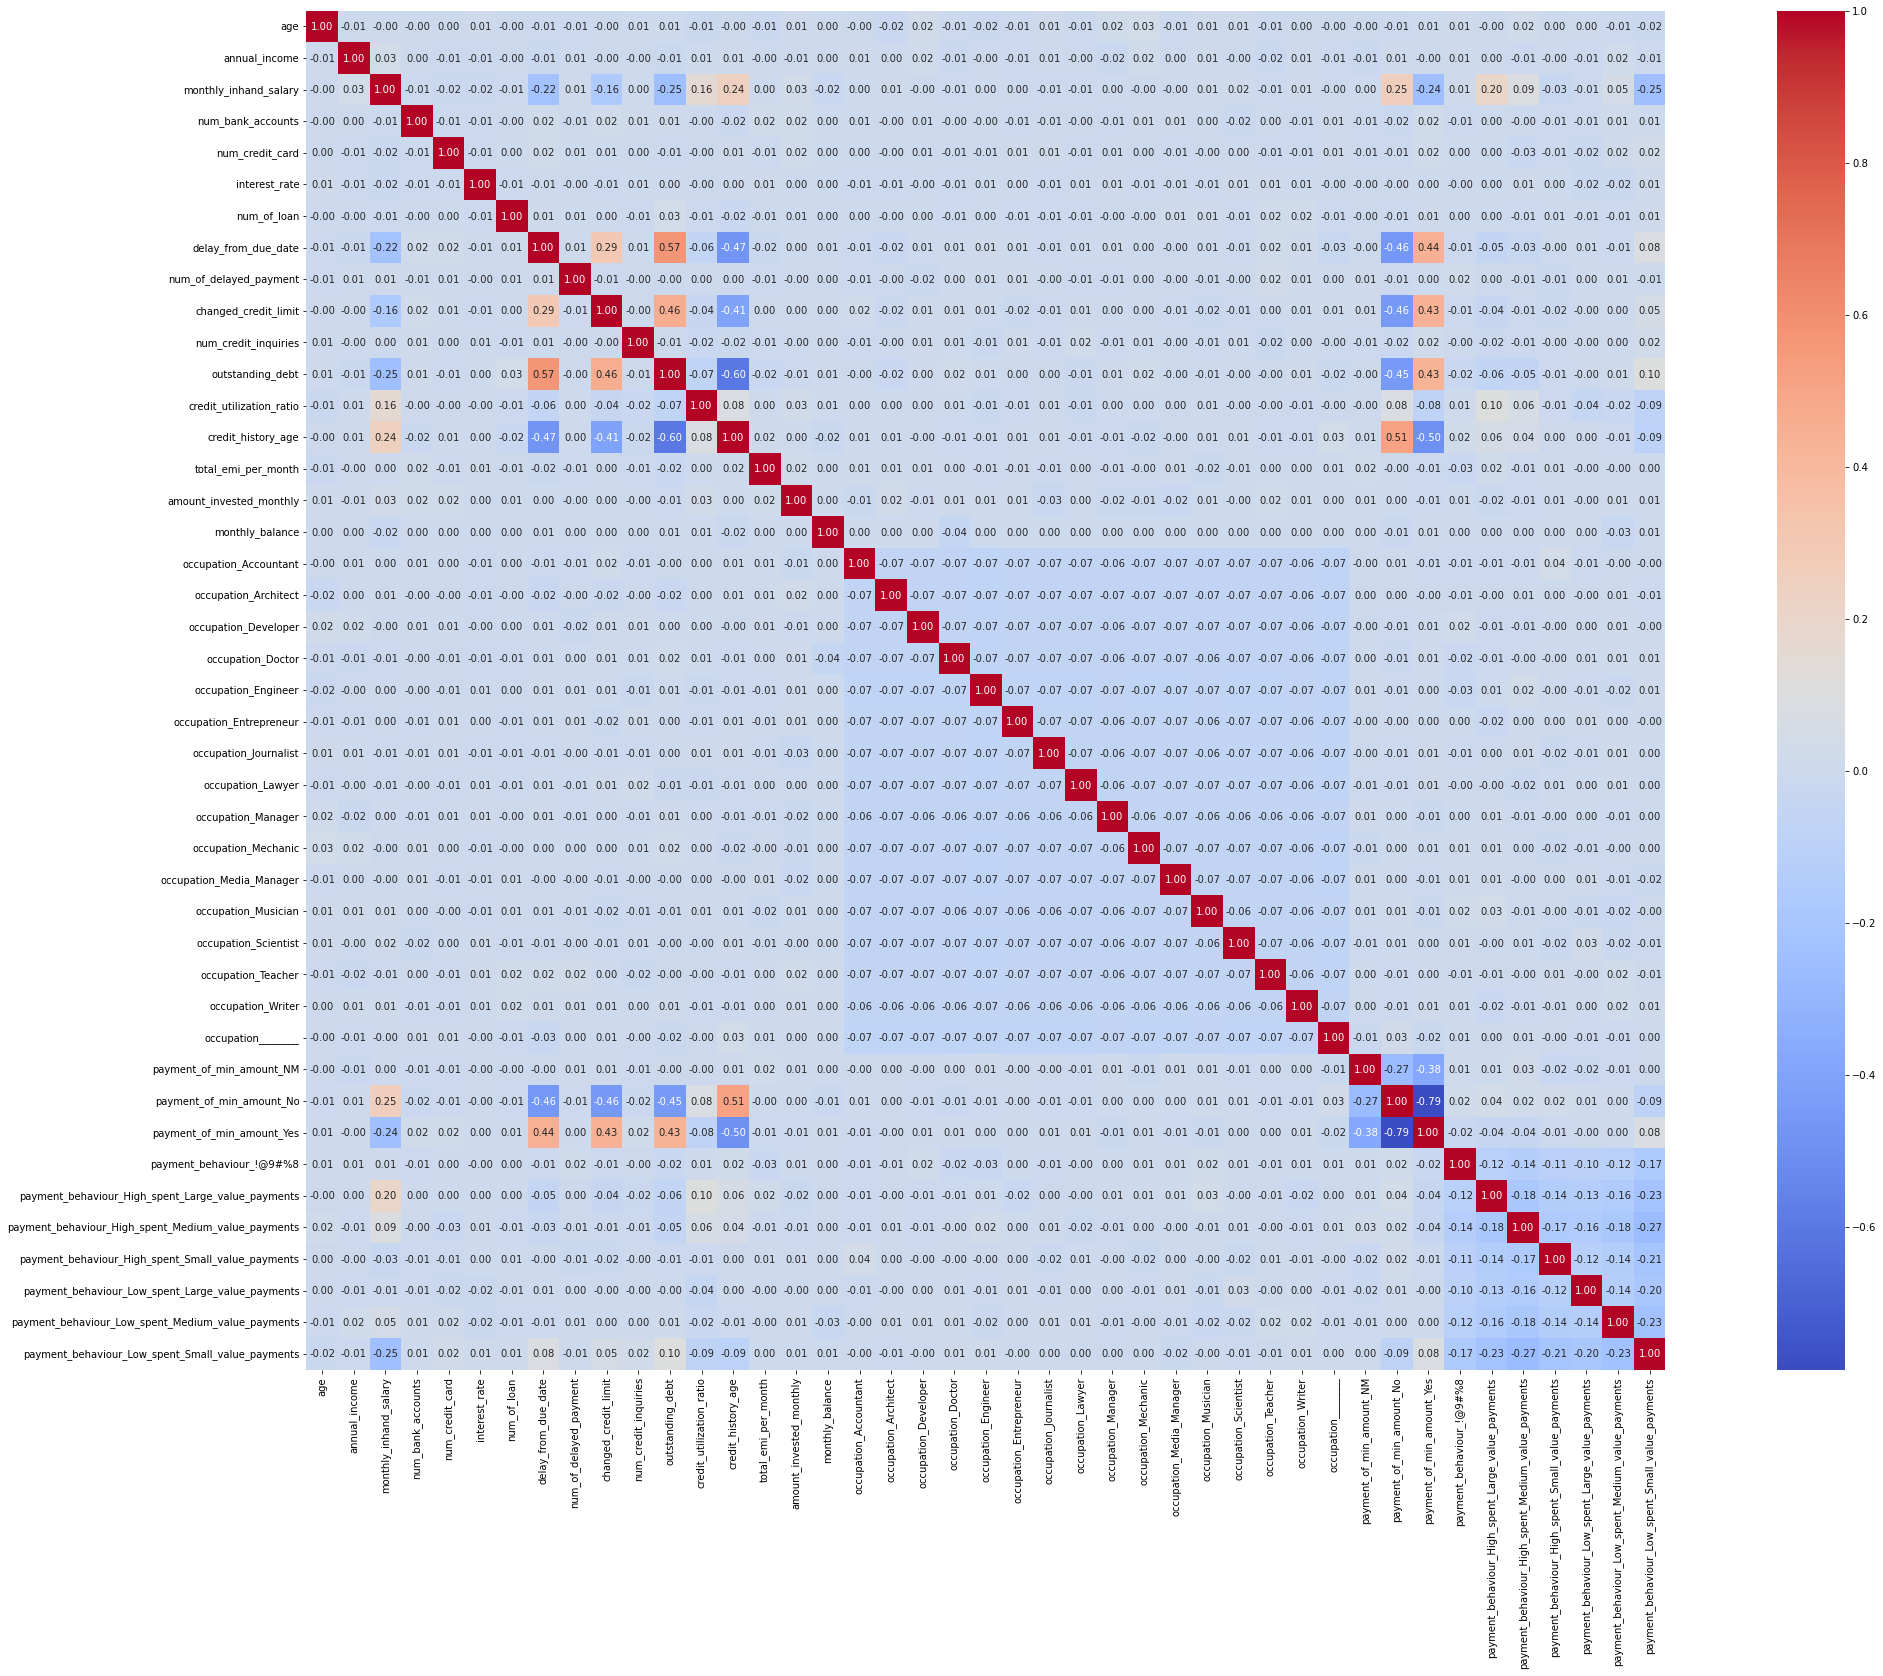

In [59]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",square = True)
plt.show()

In [61]:
# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Definir un umbral de correlación (puedes ajustar según tus necesidades)
threshold = 0.3

# Encontrar pares de características altamente correlacionadas
highly_correlated_pairs = []

# Iterar sobre las columnas de la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Agregar el par de características altamente correlacionadas a la lista
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(feature_pair)

# Imprimir la lista de pares de características altamente correlacionadas
print("Pares de características altamente correlacionadas:")
for pair in highly_correlated_pairs:
    print(pair)

Pares de características altamente correlacionadas:
('delay_from_due_date', 'outstanding_debt')
('delay_from_due_date', 'credit_history_age')
('delay_from_due_date', 'payment_of_min_amount_No')
('delay_from_due_date', 'payment_of_min_amount_Yes')
('changed_credit_limit', 'outstanding_debt')
('changed_credit_limit', 'credit_history_age')
('changed_credit_limit', 'payment_of_min_amount_No')
('changed_credit_limit', 'payment_of_min_amount_Yes')
('outstanding_debt', 'credit_history_age')
('outstanding_debt', 'payment_of_min_amount_No')
('outstanding_debt', 'payment_of_min_amount_Yes')
('credit_history_age', 'payment_of_min_amount_No')
('credit_history_age', 'payment_of_min_amount_Yes')
('payment_of_min_amount_NM', 'payment_of_min_amount_Yes')
('payment_of_min_amount_No', 'payment_of_min_amount_Yes')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>